WARNING:

"fitting_parameters.h5" need to be in the directory you are working on
or there will be an error for importing mr_forecast in the next cell.

If you don't want the file in this directory,
change the mr_forecast.py line 16

hyper_file = 'fitting_parameters.h5' 

->

hyper_file = [directory of fitting parameter file]+'fitting_parameters.h5'

In [1]:
%matplotlib inline
from __future__ import (print_function, absolute_import,
                        division, unicode_literals)
import numpy as np
import mr_forecast as mr
import matplotlib.pyplot as plt

================================

predict the mean and std of radius given those of the mass

In [2]:
Rmedian, Rplus, Rminus = mr.Mstat2R(mean=1.0, std=0.1, unit='Earth', sample_size=100, classify='Yes')

Terran 97.0 %, Neptunian 3.0 %, Jovian 0.0 %, Star 0.0 %


In [4]:
print('R = %.2f (+ %.2f - %.2f) REarth' % (Rmedian, Rplus, Rminus))

R = 1.04 (+ 0.08 - 0.10) REarth


================================

predict a vector of radius given a vector of mass

In [5]:
M1 = np.loadtxt('demo_mass.dat')
R1 = mr.Mpost2R(M1, unit='Earth', classify='Yes')

Terran 100.0 %, Neptunian 0.0 %, Jovian 0.0 %, Star 0.0 %


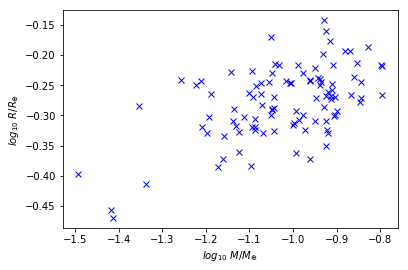

In [6]:
plt.plot(np.log10(M1), np.log10(R1), 'bx')
plt.xlabel(r'$log_{10}\ M/M_{\oplus}$')
plt.ylabel(r'$log_{10}\ R/R_{\oplus}$')
plt.show()

================================

predict the mean and std of mass given those of the radius

In [7]:
Mmedian, Mplus, Mminus = mr.Rstat2M(mean=0.1, std=0.01, unit='Jupiter', sample_size=100, grid_size=1e3, classify='Yes')

Terran 62.0 %, Neptunian 38.0 %, Jovian 0.0 %, Star 0.0 %


In [8]:
print('M = %.3f (+ %.3f - %.3f) MEarth' % (Mmedian, Mplus, Mminus))

M = 0.005 (+ 0.004 - 0.002) MEarth


================================

predict a vector of mass given a vector of radius

In [9]:
R2 = np.loadtxt('demo_radius.dat')
M2 = mr.Rpost2M(R2, unit='Earth', grid_size=1e3, classify='Yes')

Terran 73.0 %, Neptunian 27.0 %, Jovian 0.0 %, Star 0.0 %


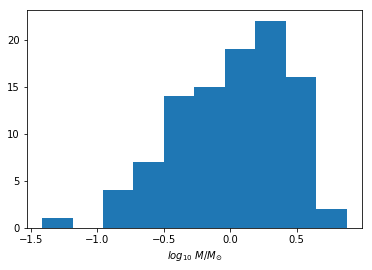

In [10]:
plt.hist(np.log10(M2))
plt.xlabel(r'$log_{10}\ M/M_{\odot}$')
plt.show()